In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
home_furniture = pd.read_csv('Furniture.csv')
home_furniture.head()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733


- **price**: Selling price of the furniture.
- **cost**: Manufacturing or purchasing cost.
- **sales**: Number of units sold.
- **profit_margin**: Percentage profit on each sale.
- **inventory**: Number of units available in stock.
- **discount_percentage**: Discount applied to the product.
- **delivery_days**: Estimated days for delivery.
- **revenue**: Total revenue from the sales.
- **category**: Type of furniture (e.g., Bed, Chair, Table).
- **material**: Material of the product (e.g., Plastic, Glass, Metal).
- **color**: Product color.
- **location**: Store location (Rural, Suburban, Urban).
- **season**: Season in which sales occurred (Spring, Summer, Fall, Winter).
- **store_type**: Sales channel (Online, Retail).
- **brand**: Brand of the product (BrandA, BrandB, etc.).

In [5]:
home_furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                2500 non-null   float64
 1   cost                 2500 non-null   float64
 2   sales                2500 non-null   int64  
 3   profit_margin        2500 non-null   float64
 4   inventory            2500 non-null   int64  
 5   discount_percentage  2500 non-null   float64
 6   delivery_days        2500 non-null   int64  
 7   category             2500 non-null   object 
 8   material             2500 non-null   object 
 9   color                2500 non-null   object 
 10  location             2500 non-null   object 
 11  season               2500 non-null   object 
 12  store_type           2500 non-null   object 
 13  brand                2500 non-null   object 
 14  revenue              2500 non-null   float64
dtypes: float64(5), int64(3), object(7)
mem

In [15]:
home_furniture.describe()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,revenue
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000
mean,274.495219,191.930107,24.924000,30.208571,97.715600,14.947616,4.89400,5926.853657
std,130.898452,98.590751,14.050067,11.536804,57.616228,8.621547,2.55902,6902.737604
min,50.704297,26.505895,1.000000,10.017692,0.000000,0.005556,1.00000,-14214.565505
25%,159.104890,106.399135,13.000000,20.230697,50.000000,7.760214,3.00000,1216.719195
50%,277.641809,189.336329,25.000000,30.297911,94.000000,14.915143,5.00000,5523.232714
75%,387.378046,263.188280,37.000000,40.134205,147.000000,22.292661,7.00000,10233.537982
max,499.872953,447.022911,49.000000,49.999535,199.000000,29.991229,9.00000,32922.078832


<Axes: >

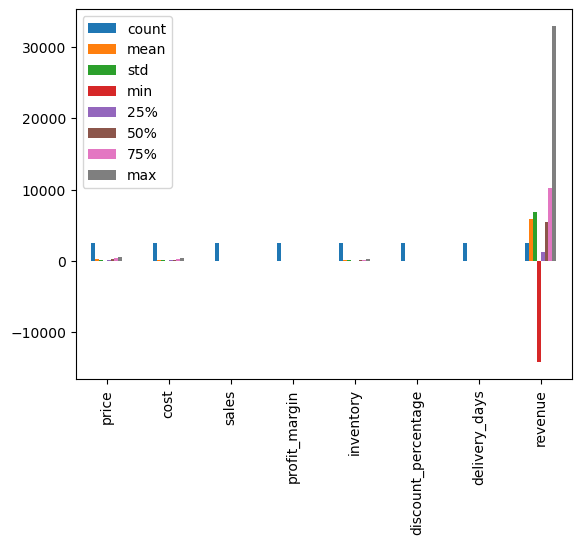

In [17]:
home_furniture.describe().T.plot(kind='bar')

[]

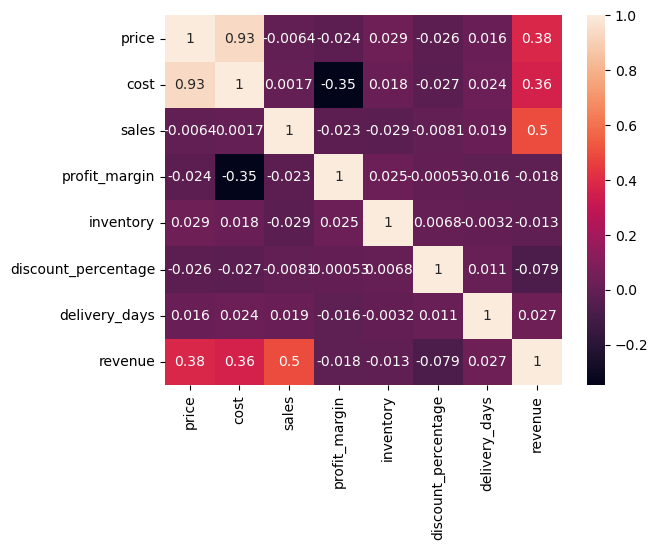

In [33]:
sns.heatmap(numeric_home_furniture.corr(), annot=True).plot()

In [25]:
numeric_home_furniture = home_furniture.select_dtypes(include=[float, int])
categorical_home_furniture = home_furniture.select_dtypes(include=[object])

### Distribution of Numeric Data

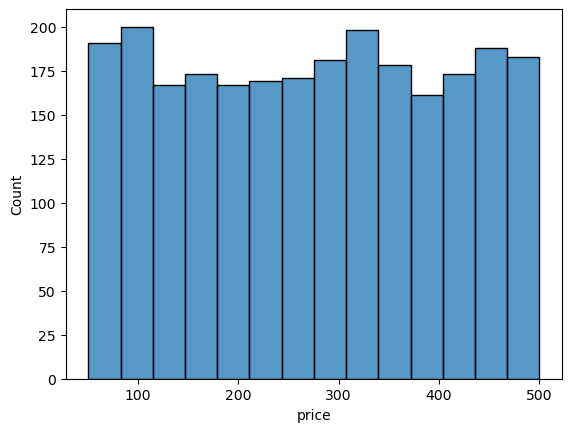

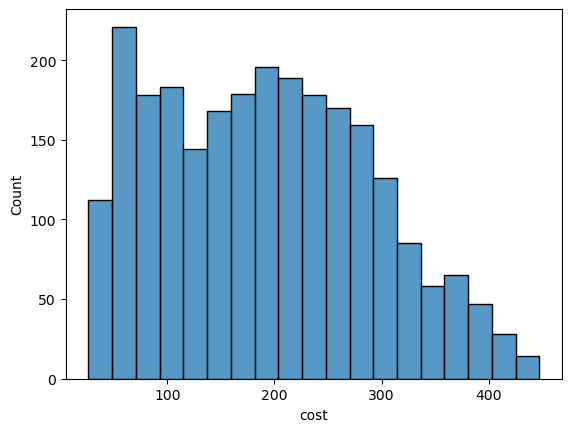

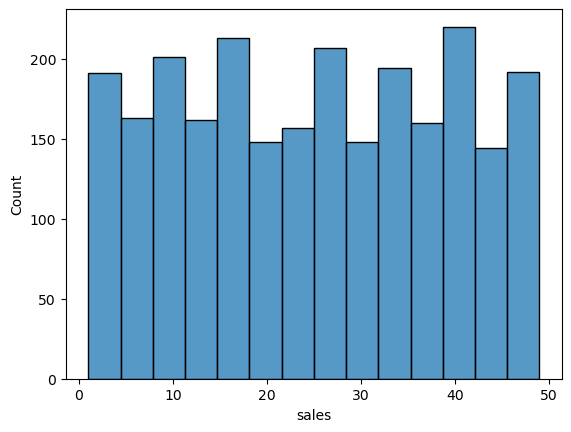

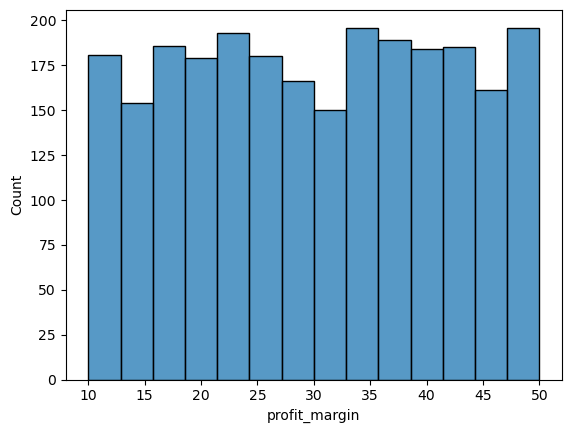

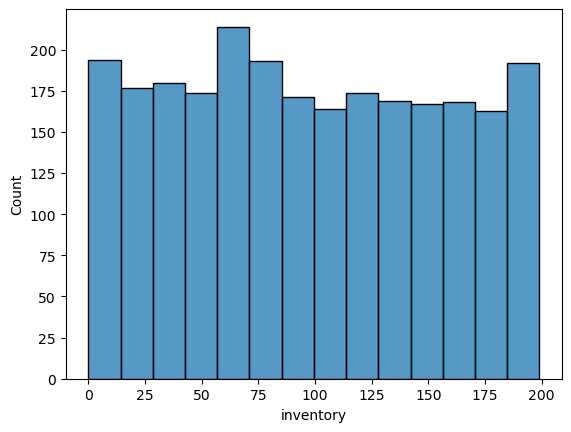

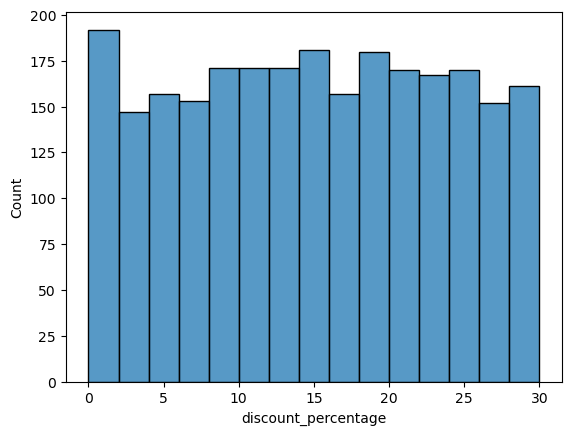

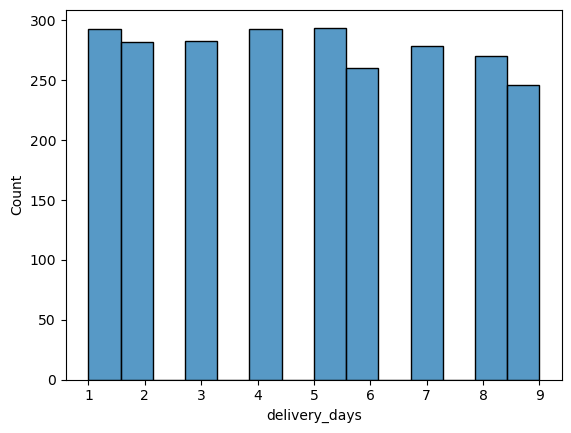

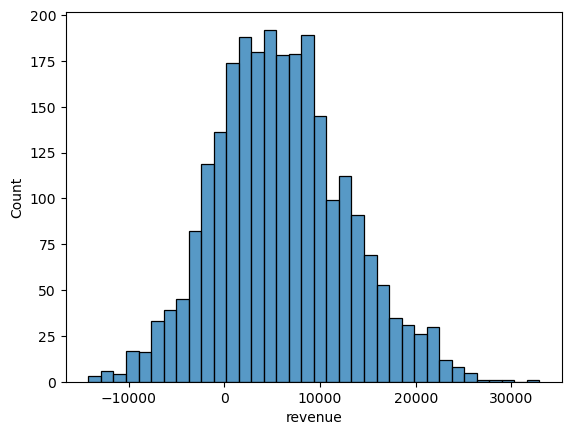

In [41]:
for col in numeric_home_furniture:
    sns.histplot(x=col, data=numeric_home_furniture)
    plt.show()

### Distribution of Categorical Data

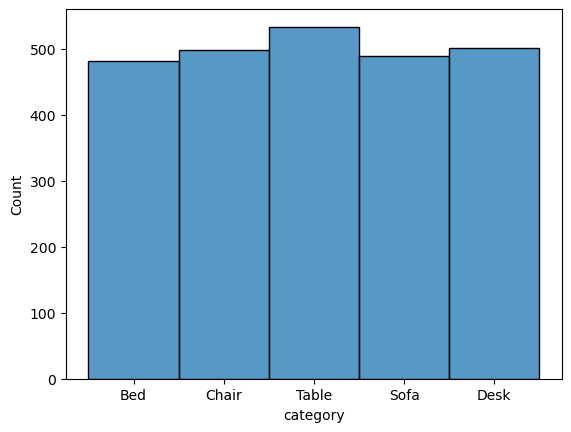

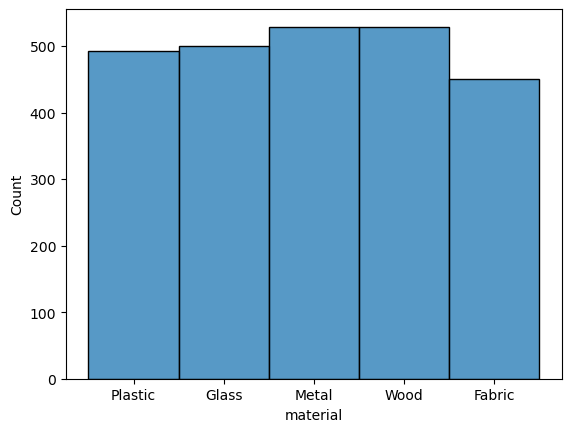

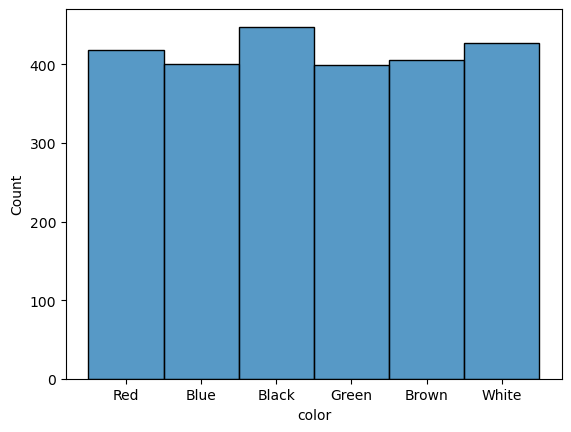

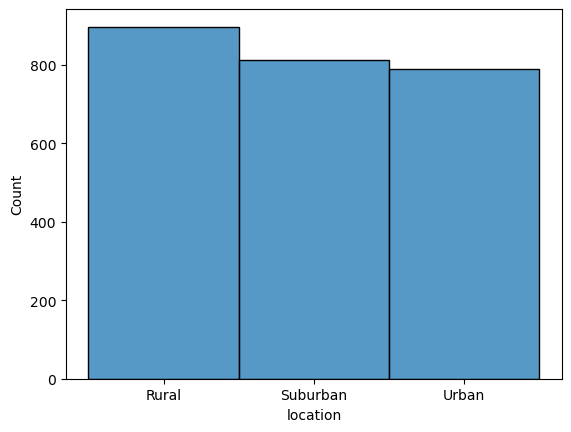

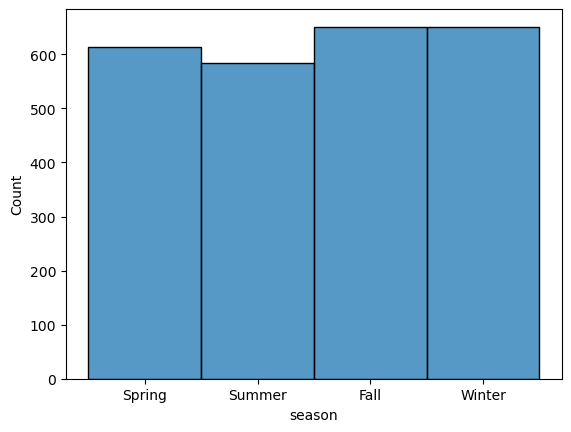

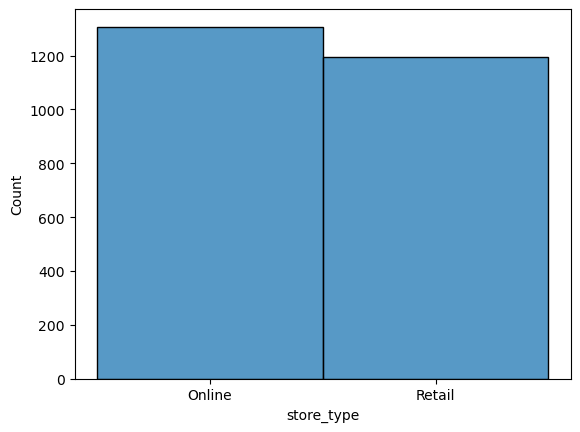

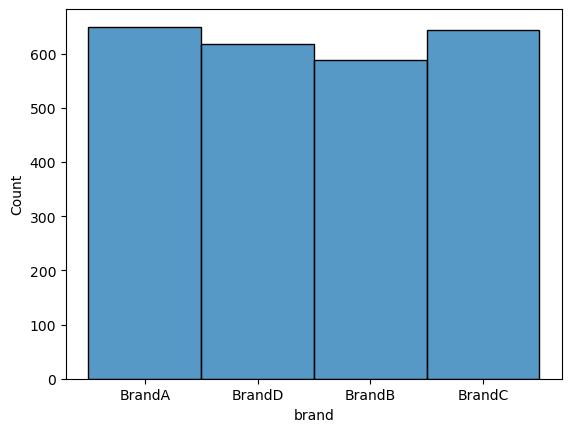

In [43]:
for col in categorical_home_furniture:
    sns.histplot(x=col, data=categorical_home_furniture)
    plt.show()

### Pricing Range of Each Category

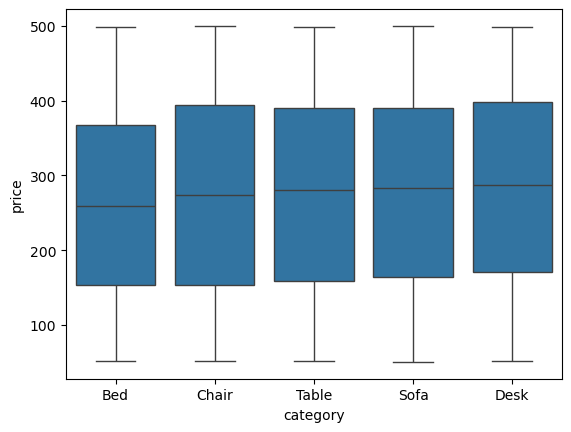

In [47]:
sns.boxplot(x='category', y='price', data=home_furniture)
plt.show()

## Exploratory Data Analysis and Customer Behavior Analysis

### Seasonal Revenue by Material

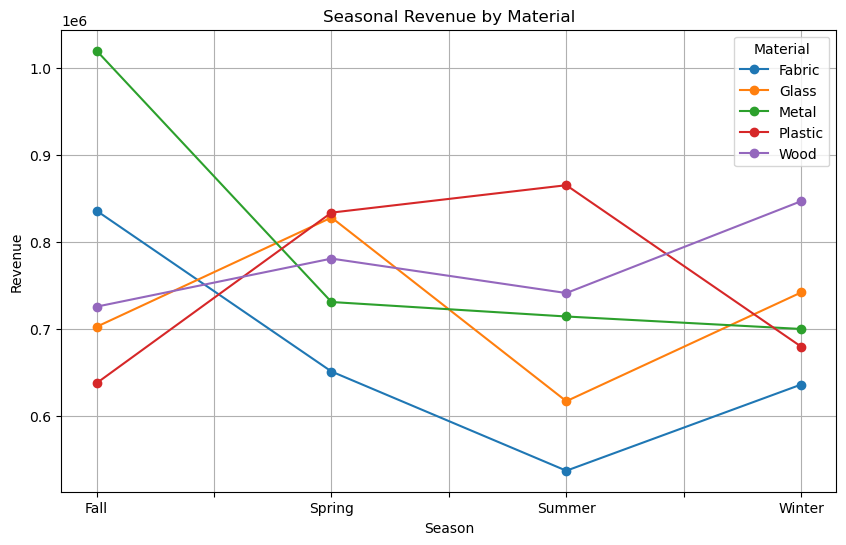

In [166]:
seasonal_revenue = home_furniture.pivot_table(index='season', columns='material', values='revenue', aggfunc='sum')
seasonal_revenue.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Seasonal Revenue by Material')
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.legend(title='Material')
plt.grid(True)
plt.show()

### Average Discount Percentage by Brand and Season

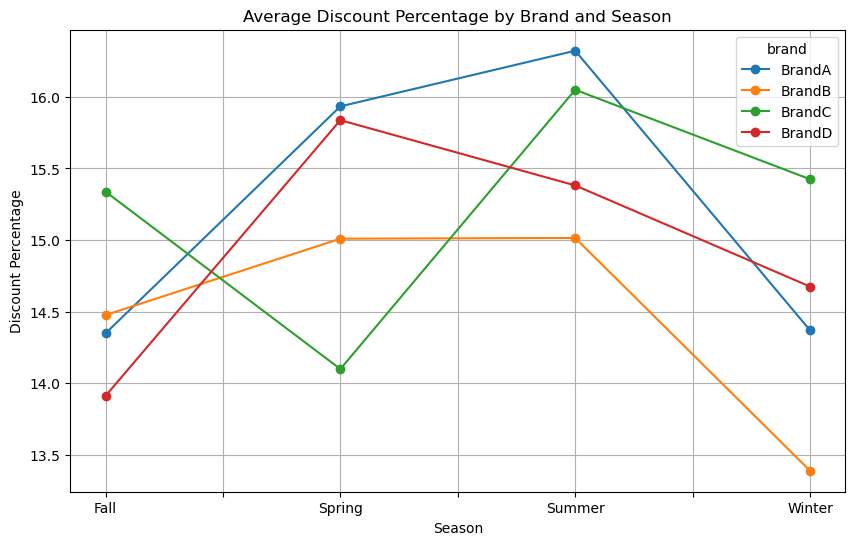

In [75]:
pivot_table = home_furniture.pivot_table(index='season', columns='brand', values='discount_percentage', aggfunc='mean')
pivot_table.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average Discount Percentage by Brand and Season')
plt.xlabel('Season')
plt.ylabel('Discount Percentage')
plt.legend(title='brand')
plt.grid(True)
plt.show()

### Category availability in Online vs Retail

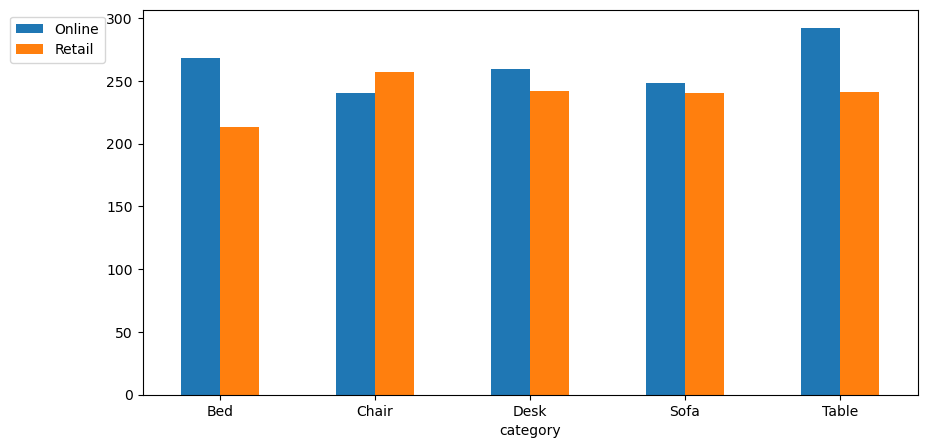

In [146]:
store_type_brand = pd.crosstab(home_furniture['category'], home_furniture['store_type'])
ax = store_type_brand.plot(kind='bar', figsize=(10, 5))
ax.legend(loc='upper left', bbox_to_anchor=(-0.18, 1))
plt.title('')
plt.xticks(rotation=0)
plt.show()

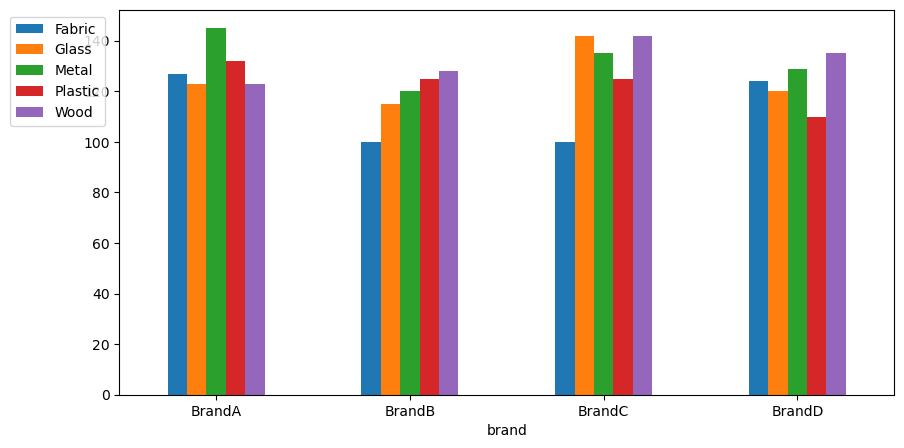

In [101]:
material_type_brand = pd.crosstab(home_furniture['brand'], home_furniture['material'])
ax = material_type_brand.plot(kind='bar', figsize=(10, 5))
ax.legend(loc='upper left', bbox_to_anchor=(-0.15, 1))
plt.xticks(rotation=0)
plt.show()

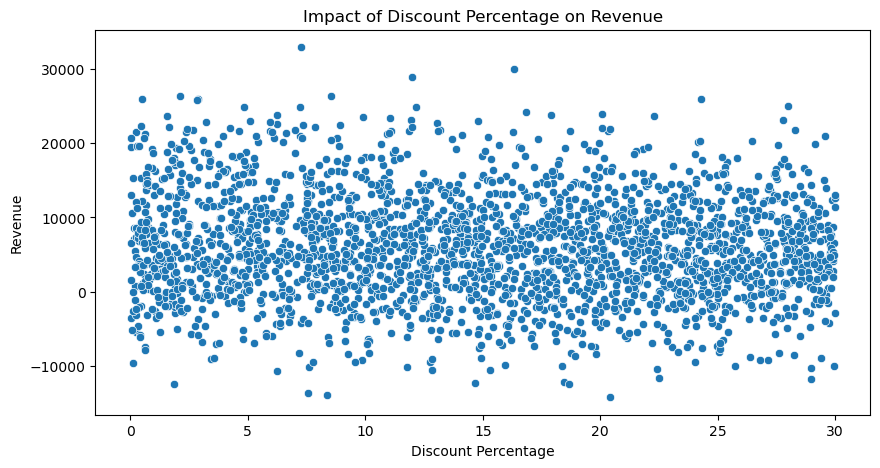

In [119]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=home_furniture['discount_percentage'], y=home_furniture['revenue'])
plt.title('Impact of Discount Percentage on Revenue')
plt.xlabel('Discount Percentage')
plt.ylabel('Revenue')
plt.show()

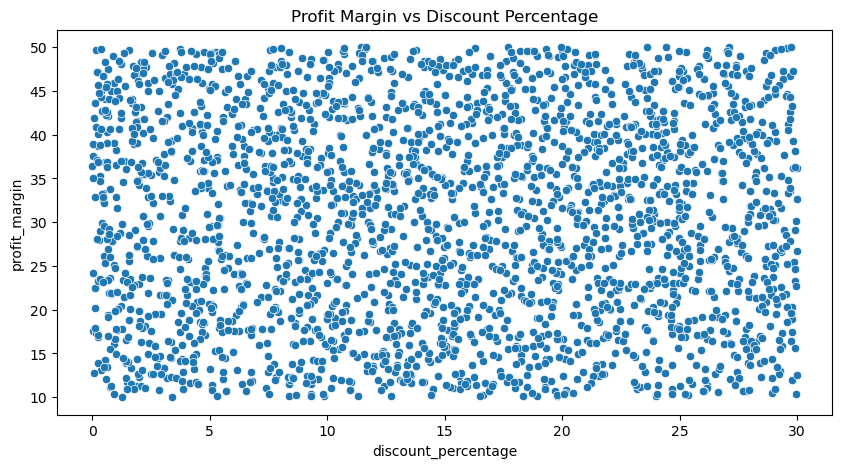

In [121]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=home_furniture['discount_percentage'], y='profit_margin', data=home_furniture)
plt.title('Profit Margin vs Discount Percentage')
plt.show()

In [149]:
brand_a = home_furniture[home_furniture['brand'] == 'BrandA']

brand_b = home_furniture[home_furniture['brand'] == 'BrandB']

brand_c = home_furniture[home_furniture['brand'] == 'BrandC']

brand_d = home_furniture[home_furniture['brand'] == 'BrandD']

### Brand availability in Online vs Retail

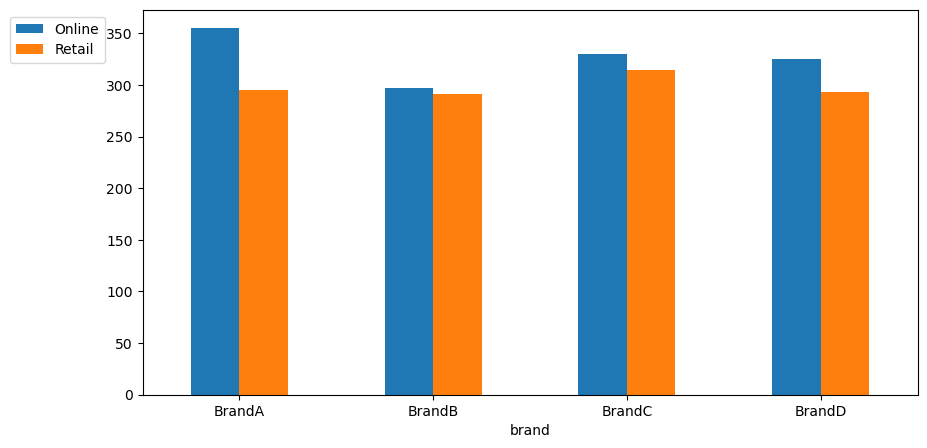

In [144]:
store_type_brand = pd.crosstab(home_furniture['brand'], home_furniture['store_type'])
ax = store_type_brand.plot(kind='bar', figsize=(10, 5))
ax.legend(loc='upper left', bbox_to_anchor=(-0.18, 1))
plt.title('')
plt.xticks(rotation=0)
plt.show()

### Revenue Generated for Each Brand from Different Locations 

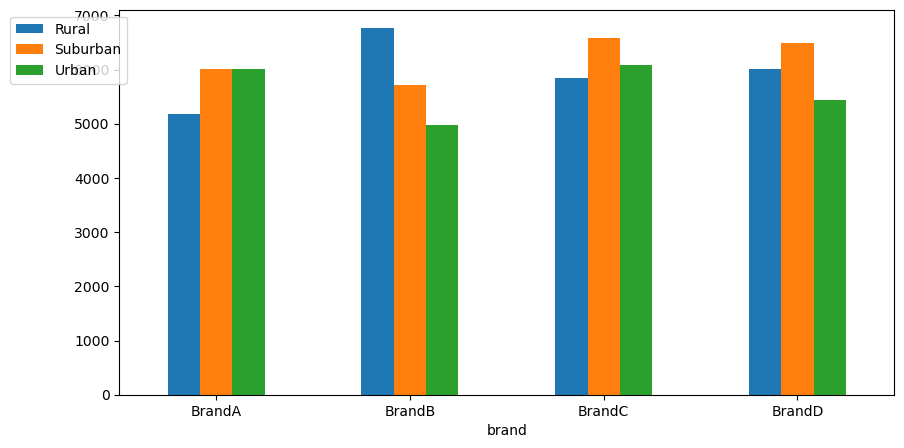

In [137]:
location_revenue_brand = pd.crosstab(home_furniture['brand'], home_furniture['location'], home_furniture['revenue'], aggfunc='mean')
ax = location_revenue_brand.plot(kind='bar', figsize=(10, 5))
ax.legend(loc='upper left', bbox_to_anchor=(-0.15, 1))
plt.xticks(rotation=0)
plt.show()

### Revenue of Different Categories for Each Brand 

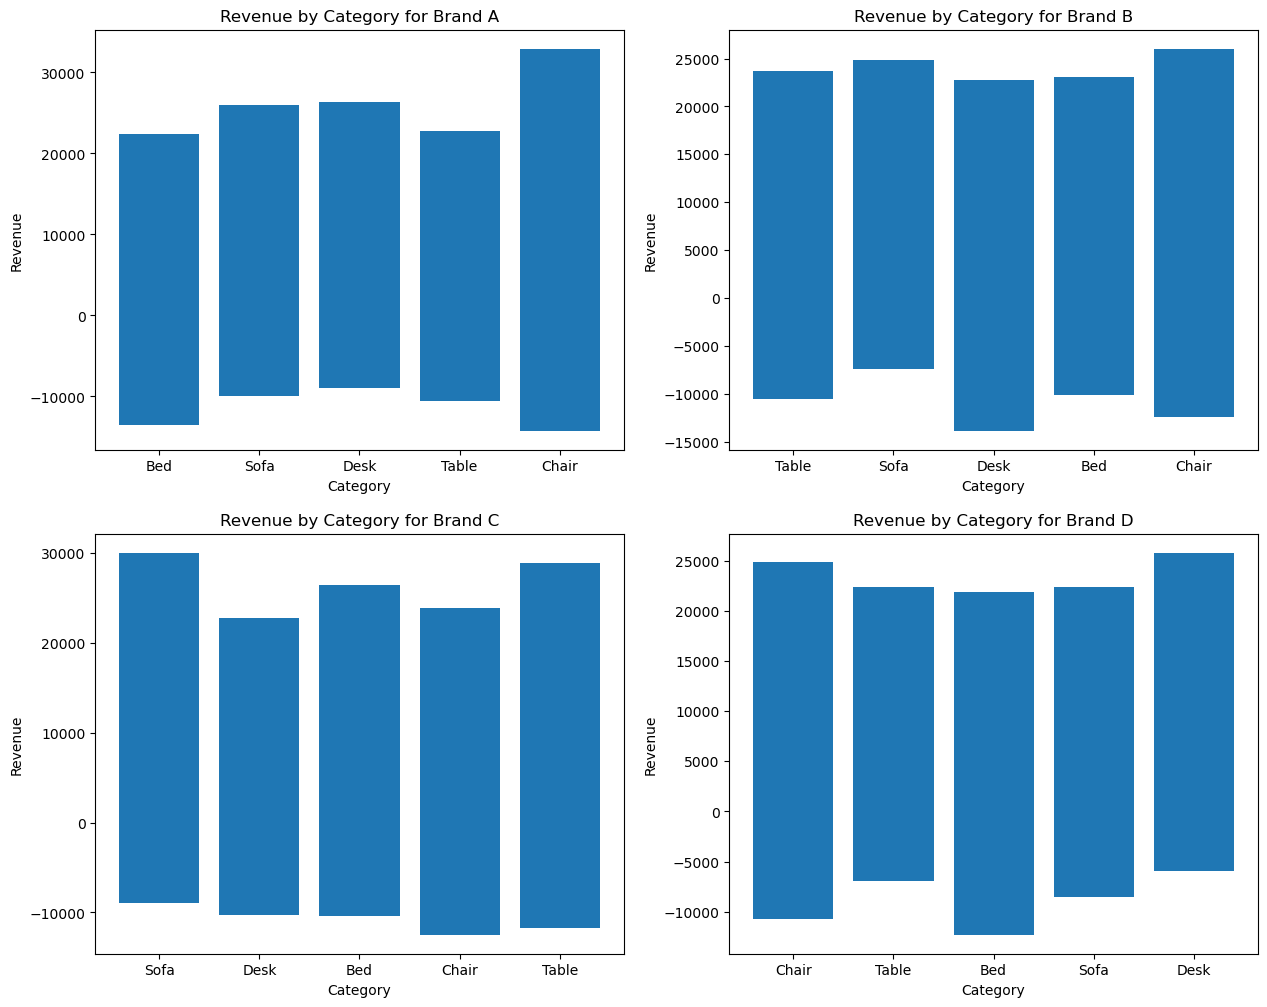

In [127]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
plt.bar(brand_a['category'], brand_a['revenue'])
plt.title('Revenue by Category for Brand A')
plt.xlabel('Category')
plt.ylabel('Revenue')

plt.subplot(2, 2, 2)
plt.bar(brand_b['category'], brand_b['revenue'])
plt.title('Revenue by Category for Brand B')
plt.xlabel('Category')
plt.ylabel('Revenue')

plt.subplot(2, 2, 3)
plt.bar(brand_c['category'], brand_c['revenue'])
plt.title('Revenue by Category for Brand C')
plt.xlabel('Category')
plt.ylabel('Revenue')

plt.subplot(2, 2, 4)
plt.bar(brand_d['category'], brand_d['revenue'])
plt.title('Revenue by Category for Brand D')
plt.xlabel('Category')
plt.ylabel('Revenue')

plt.show()

### Revenue of Different Materials for Each Brand

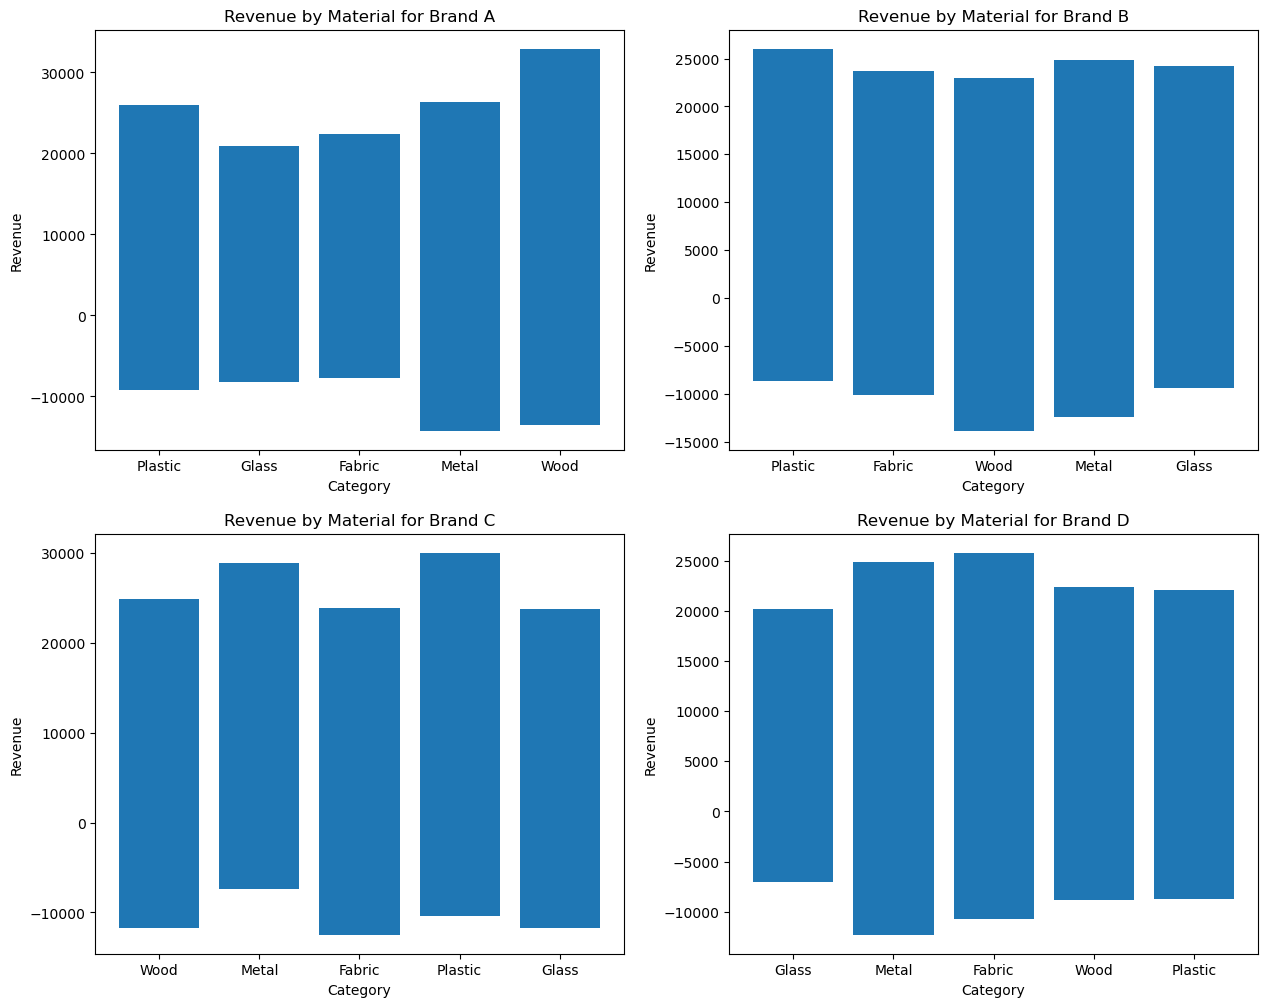

In [129]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
plt.bar(brand_a['material'], brand_a['revenue'])
plt.title('Revenue by Material for Brand A')
plt.xlabel('Category')
plt.ylabel('Revenue')

plt.subplot(2, 2, 2)
plt.bar(brand_b['material'], brand_b['revenue'])
plt.title('Revenue by Material for Brand B')
plt.xlabel('Category')
plt.ylabel('Revenue')

plt.subplot(2, 2, 3)
plt.bar(brand_c['material'], brand_c['revenue'])
plt.title('Revenue by Material for Brand C')
plt.xlabel('Category')
plt.ylabel('Revenue')

plt.subplot(2, 2, 4)
plt.bar(brand_d['material'], brand_d['revenue'])
plt.title('Revenue by Material for Brand D')
plt.xlabel('Category')
plt.ylabel('Revenue')

plt.show()

### Predictive Analytics to Predict Revenue

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [176]:
label_encoders = {}
for col in categorical_home_furniture:
    le = LabelEncoder()
    home_furniture[col] = le.fit_transform(home_furniture[col])
    label_encoders[col] = le

In [178]:
X = home_furniture.drop(columns=['revenue'])
y = home_furniture['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [182]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [184]:
y_pred = model.predict(X_test)

In [186]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R-Squared Score: {r2}")

Mean Absolute Error: 4456.234491238801
R-Squared Score: 0.42196095577113024
